### Counting Words

Begin by enabling plots to be displayed in the Jupyter notebook and importing the pandas library. 

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns

The sample text for this section is from the UN General Debate Corpus. These were released on [kaggle](https://www.kaggle.com/unitednations/un-general-debates/home). Since CSV files aren't really well-designed to hold long text fields with line-breaks, quotation marks and commas (which might interpretated by a csv reader as the start of a new field), the addresses are in the json file format.

In [2]:
un_df = pd.read_json('data/un-general-debates.json')

I use `info`, `describe`, and `sample` to get a sense of the data.

In [3]:
un_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         3214 non-null   int64 
 1   speech_year   3214 non-null   int64 
 2   country_code  3214 non-null   object
 3   speech_text   3214 non-null   object
dtypes: int64(2), object(2)
memory usage: 125.5+ KB


In [4]:
un_df.describe()

,index,speech_year
count,3214.000000,3214.000000
mean,3417.843808,1989.961419
std,2048.354531,5.787857
min,0.000000,1980.000000
25%,1767.250000,1985.000000
50%,3487.500000,1990.000000
75%,5566.750000,1995.000000
max,6808.000000,1999.000000


In [5]:
un_df.sample(5)

,index,speech_year,country_code,speech_text
3102,6697,1994,NLD,"First of all, I\nshould like to extend congrat..."
2154,4220,1998,PRY,"It is with great pleasure that I speak today, ..."
84,84,1989,BRB,"﻿\nMr. President, I am very pleased to see suc..."
887,1851,1997,SWE,﻿I sincerely\ncongratulate the Foreign Ministe...
526,981,1986,DJI,I an very pleased to congratulate you most sin...


A specific row can be referenced using its index through `iloc`. Here's what the first 800 characters of the variable `sotu_text` look like from a random row.

In [6]:
un_df.iloc[2305]

index                                                        4752
speech_year                                                  1980
country_code                                                  SAU
speech_text     ﻿I should like first, Sir, to add my voice to ...
Name: 2305, dtype: object

In [8]:
display(un_df.iloc[235]['speech_text'][:280])

'Allow me, first of all, to offer Ambassador de Piniés my sincere congratulations on his election to the presidency of the fortieth session of the General Assembly. I assure him of the full co-operation of the Danish delegation in his performance of the duties of his high office.\n'

### Word Count

One the simplest things one might want to know about text is how long is it. This could be useful for basic descriptive questions, such as "Have UN speeches increased in length over time?" Word counts are also useful for normalized texts. A 200 word essay with 10 exclamation marks is quite different from a 20,000 word essay with 10 exclamation marks.

One method for doing this would be to split a text string by spaces and count the lenght of the resulting string.


In [12]:
sentence = "I wish to congratulate  you, Sir, on your election as President of the General  Assembly"
len(sentence.split())

15

To make simple text maniupluation functions like this a little easier, we bundled some in the `pdtext` package. You may need to `pip install pdftext` if you have never used it before.

In [14]:
from pdtext.tf import word_count

In [15]:
word_count(sentence)

15

## Word Count Ex. 1
Create a new sentence stored as a string. Count the words.  




Now that the function has been imported, it can applied to our text variable, `sotu_text` to create a new variable with the number of words in the address.

In [16]:
un_df['speech_word_count'] = un_df['speech_text'].apply(word_count)

`describe`, `hist`, and `scatter` can provide some information on the new variable.

In [17]:
un_df['speech_word_count'].describe()

count     3214.000000
mean      3273.919726
std       1117.532078
min        462.000000
25%       2500.750000
50%       3148.500000
75%       3898.500000
max      10007.000000
Name: speech_word_count, dtype: float64

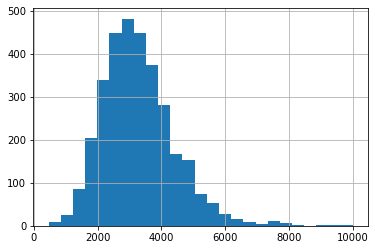

In [18]:
un_df['speech_word_count'].hist(bins = 25)

Seaborn's `boxplot` can be used to display how text speeches have changed over time.

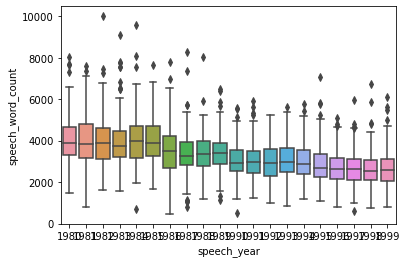

In [19]:
sns.boxplot(x = "speech_year", 
            y = "speech_word_count",
            data =un_df)

The dataset can be subset to just a few informative columns and then the `sort_values` and `head`/`tail` methods can list the longest and shortest addresses.

In [22]:
un_df.sort_values(by='speech_word_count').head(10)

,index,speech_year,country_code,speech_text,speech_word_count
538,993,1986,VCT,On behalf of the Government and people of Sai...,462
2959,6434,1990,DDR,"﻿Mr. President, I wish to thank you on behalf ...",493
928,1892,1997,SYC,"﻿I take this opportunity to congratulate you, ...",597
1175,2469,1984,STP,﻿The established practice in the United Nation...,713
2064,4130,1998,BRN,I\nextend my congratulations to Mr. Opertti on...,735
648,1417,1996,PLW,﻿It is my distinct honour to\naddress the Unit...,779
1839,3905,1987,BGD,"﻿Mr. President, it is a marvellous feeling, on...",781
1733,3614,1999,PER,"The\ndelegation of Peru is greatly pleased, Si...",787
2631,5928,1981,STP,147.\t Once a year the great family of Members...,794
2413,5570,1993,MCO,"For me this is a very special occasion, for it...",860


In [23]:
un_df.sort_values(by='speech_word_count', ascending=False).head(10)

,index,speech_year,country_code,speech_text,speech_word_count
1988,4054,1982,PAN,"Mr. President, your many years of association ...",10007
1177,2471,1984,IRL,﻿104. I have the honour of addressing the Gene...,9612
1571,3308,1983,PRY,"﻿238.\tMr. President, my first words will\nbe ...",9115
1801,3867,1987,IRN,"﻿O Lord, with Thy holy name I begin and from T...",8271
1156,2450,1984,RUS,"﻿Mr. Lusaka, I congratulate you on your electi...",8069
1047,2152,1988,GRC,﻿On behalf of the European Community and its m...,8050
2284,4731,1980,LUX,﻿Since Luxembourg is President of the Council ...,8043
572,1027,1986,IRN,I have great pleasure in extending to Mr. Cho...,7814
1549,3286,1983,COD,"﻿173.\tFirst of all, Sir, on behalf of the del...",7809
1565,3302,1983,IRN,﻿ 'Those not following the true path of God ex...,7768


In [28]:
print(un_df.iloc[1988]['speech_text'][:2000])

Mr. President, your many years of association 
with the United Nations, during which you have 
demonstrated your wisdom, spirit of co-operation 
and human qualities, have earned you your 
election, which guarantees the successful outcome 
of our work for all States Members of the United 
Nations. We welcome your presidency of the 
General Assembly and should like to pledge the 
determined co-operation of the delegation of 
Panama. I am expressing the feelings of broad 
sectors of mankind when I say in addition that we 
wish to praise the outstanding job done by the 
distinguished statesman of the third world, Mr. 
Ismat Kittani, as President of the thirty-sixth 
session of the General Assembly. He is a tireless 
promoter of the ideals of the United Nations.

3. Never before in the history of mankind has 
there been so many sombre political and economic 
factors as there are today which have created 
such an ominous world situation.

4. Even for those who maintain that international 
la

Cuba and Libyan leaders are the longwinded.

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Work as a team. Open a new notebook. In the `files` folder, there is a file called "wine_reviews.csv" which contains written reviews (`description`) and scores (`points`, `rating`).
What is the average (median) number of words in a review? Make a plot or two.


</div>


#### Word frequencies

```Oz is strong, Oz is proud, and Oz is free.```

into something like:

| oz | and | free | is | proud | strong |
|:-------:|-----|------|----|-------|--------|
| 3       | 1   | 1    | 3  | 1     |    1   |



```Oz is strong, Oz is proud, and Oz is free.```


|word|freq|
|---|---|
|america|3|
|and|1|
|free|1|
|is|3|
|proud|1|
|strong|1|

Word frequencies are the backbone of almost all text analysis. From topic models to text classification, counting how often certain words occur is a critical step in quantifying texts. While it is certainly possible to compute word frequencies using your own functions, that is usually unnecessary, as many Python libraries can compute words frequencies. 


Like all frequency tables, it is possible to create word frequency tables in either wide or long form. If you don't really care about which specific words are in a text, but are mostly using them for subsequent statistical analysis, you'll likely need them in the first, wide format. Here, each text is a row and each word a variable. This is the modal format for how text is interpreted as numbers. 

Alternatively, if you want to know about which specific words, or types of words, are most common, you might favor the second, long approach. 

In either case, note that in both cases we are disregarding the word order in the original sentence. With few notable exceptions, analysts take what is called a bag-of-words approach. This simplifying assumption, that word order doesn't really matter, has two things going for it. First, it is computationally much easier to assume that order of words in a sentence doesn't matter. Second, the results, as you will see, are often pretty solid. Fields like sociology, which are based on the idea that individuals are shaped by their surroundings, analyze individual survey data frequently to great success. Bag-of-words is like that. We know context matters, but modeling strategies that ignore this can still provide fairly good estimates.


In [18]:
from pdtext.tf import make_wf_df

We start off with some sample sentences.

In [19]:
sentences = ['Unequal exchange is ruining and impoverishing our peoples and must cease.',
            'Arms expenditures are irrational.', 
             'They must cease and the funds thus released must be used to finance development.']

In [21]:
wf_df = make_wf_df(sentences)

In [22]:
wf_df

,and,are,arms,be,cease,development,exchange,expenditures,finance,funds,...,our,peoples,released,ruining,the,they,thus,to,unequal,used
0,2,0,0,0,1,0,1,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,1,0,0,1,1,...,0,0,1,0,1,1,1,1,0,1


We can create a variable in the dataframe with the original texts. Since `sentences` is a list of two items, and because we know the the order of `sentences` matches the order of `df`, it is fairly straightfoward to add the new column.

In [23]:
wf_df['sentence'] = sentences

In [24]:
wf_df

,and,are,arms,be,cease,development,exchange,expenditures,finance,funds,...,peoples,released,ruining,the,they,thus,to,unequal,used,sentence
0,2,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,Unequal exchange is ruining and impoverishing ...
1,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Arms expenditures are irrational.
2,1,0,0,1,1,1,0,0,1,1,...,0,1,0,1,1,1,1,0,1,They must cease and the funds thus released mu...


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a word frequency dataframe based on the following sentences.
</div>

In [25]:
seuss_sen = ['This one has a little star.', 
            'This one has a little car.', 
            'Say!',
            'What a lot of fish there are.']

If instead, we wanted the most frequent words, we could use the summary option.

In [26]:
make_wf_df(sentences, summary = True)

and              3
must             3
cease            2
impoverishing    1
are              1
arms             1
be               1
development      1
exchange         1
expenditures     1
finance          1
funds            1
used             1
unequal          1
is               1
our              1
peoples          1
released         1
ruining          1
the              1
they             1
thus             1
to               1
irrational       1
dtype: int64

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a word frequency datframe from our Suess sentences.
</div>

We can now create a new dataframe based on the UN texts

In [27]:
un_wf = make_wf_df(un_df['speech_text'])

This rebuilt our vocabulary list, which is now much longer.

In [28]:
len(un_wf.keys())

54980

We can use slice to examine an arbitrary section of the vocabulary.

In [29]:
un_wf.keys()[11510:11520]

Index(['colonizing', 'colons', 'colony', 'color', 'colorado', 'coloration',
       'colored', 'coloreds', 'colorful', 'coloring'],
      dtype='object')

In [30]:
un_wf.head()

,0,00,000,0001,000yearlong,001,003,005,006,007,...,у,хxi24,ч,ш,ш1оп,ш1ь1а,щ,ь,ьо1л,ю
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
un_wf.sum().sort_values(ascending=False)[:20]

the        1899856
of         1157672
and         797094
to          735169
in          523852
a           340669
that        314683
is          241832
for         230472
we          220360
on          164270
this        140718
our         139917
be          138408
it          138368
as          135677
with        128166
by          127714
nations     124783
are         121995
dtype: int64

We can create a new dataframe that merges our better word frequencies with the original UN dataframe. pandas `concat` takes a list of dataframes and merges them. The value of `axis=1` means that datasets should be merged sided by side -- each data set is providing new columns, not new rows. Critically, `concat` assumes that the cases are in the same order in each of the dataframes. If this is not the case (or you are not sure), and you are merging based on a the value of column, you should use `merge`.

In [40]:
df_combined = pd.concat([un_df, un_wf], axis=1)

In [41]:
df_combined.head()

,country_code,speech_text,speech_year,speech_word_count,0,00,000,0001,000yearlong,001,...,у,хxi24,ч,ш,ш1оп,ш1ь1а,щ,ь,ьо1л,ю
0,MDV,﻿It is indeed a pleasure for me and the member...,1989,3008,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",1989,2723,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NER,"﻿\nMr. President, it is a particular pleasure ...",1989,4850,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,URY,﻿\nDuring the debate at the fortieth session o...,1989,2699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ZWE,﻿I should like at the outset to express my del...,1989,4541,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If you wanted to stop here, either to pick up your analysis on a different day or to complete your work in a different program, you could export the combined dataframe. if you wanted to keep the address text in your file, I would recommend storing it as JSON to avoid potential issues with that long text field. `orient='records'` ensures that each item in the JSON will be a case. 

In [ ]:
# df_combined.to_json('un_wf.json', orient='records')

Alternatively, if you didn't care about the text, or new you already had it saved in the original json file, you can drop the text field and export to a csv file. `axis=1` tells pandas that you want to drop a column, rather than a row.

In [ ]:
# df_combined.drop('speech_text', axis=1).to_csv('sotu_wf.csv')

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Back in your team. What were the most common words used in wine reviews?

</div>

An alternate strategy for removing words entirely involves constructing weights that are based on how frequently a word occurs in a particular document compared to how frequently it appears in other documents. As an example, a word like "of" would score low in every document if it was commonly found and used in similar frequencies across documents. On the other hand, a word like "America" might be used in every text, but some addresses might use it more frequently, it which case it would score high in just those instances. Finally, the highest scores would be associated with a word like "terrorism", which would not only occur in a small proportion of addresses, but also appear frequently in the few addresses that include it.  

The most common algorithm for this sort of word weight is called term-frequency/inverse document frequency, or TF-IDF. The numerator, term frequency, is how frequently a word occurs in a document divided by the number of words in the document. The denominator is the natural log of the fraction of the total number of documents divided by the number of documents with term in it. 

Returning to our two sample sentences:

Scikit-learn's `TfidfVectorizer` can be used to compute tf-idfs with identical syntax to the `CountVectorizer`.

![](http://dovgalecs.com/blog/wp-content/uploads/2012/03/img131.gif)

In [31]:
make_wf_df(sentences, tfidf = True)


,and,are,arms,be,cease,development,exchange,expenditures,finance,funds,...,our,peoples,released,ruining,the,they,thus,to,unequal,used
0,0.470070,0.0,0.0,0.000000,0.235035,0.000000,0.309043,0.0,0.000000,0.000000,...,0.309043,0.309043,0.000000,0.309043,0.000000,0.000000,0.000000,0.000000,0.309043,0.000000
1,0.000000,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.207216,0.0,0.0,0.272464,0.207216,0.272464,0.000000,0.0,0.272464,0.272464,...,0.000000,0.000000,0.272464,0.000000,0.272464,0.272464,0.272464,0.272464,0.000000,0.272464


As before, we can create apply the vectorizer to the UN addresses. 

In [32]:
un_tfidf_df = make_wf_df(un_df['speech_text'], tfidf = True)



As before, the original dataframe and the tf-idf dataframe can be combined with `concat`.

In [ ]:
un_df_combo2 = pd.concat([un_df, un_tfidf_df], axis=1)

In [ ]:
un_df_combo2.info()

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Group project again. Create a tf-idf dataframe from the wine speeches. Do it!

</div>

